# Análise Exploratória
- O principal passo de um projeto de Ciência de Dados, bem antes de usar modelos de Aprendizado de Máquinas, é **entender os seus dados**!
- Algumas etapas são fundamentais nesse processo!
- Vamos usar a base de sobrevivência do titanic para responder a pergunta:
    - **Seria possível prever a sobrevivência de uma pessoa no titanic?**
    - Base de dados: https://www.kaggle.com/competitions/titanic/data

As colunas desse dataset são:
- Passenger ID: ID do passageiro (número único para cada um dos passageiros)
- Survived: sobrevivente (0 = Não, 1 = Sim)
- Pclass: Classe da passagem (1 = primeira classe, 2 = segunda classe, 3 = terceira classe)
- Name: nome do passageiro
- Sex: Gênero do passageiro
- Age: Idade (em anos) do passageiro
- SibSp: número de irmãos / cônjuges a bordo do Titanic
- Parch: número de pais / filhos a bordo do Titanic
- Ticket: número do ticket
- Fare: tarifa da passagem
- Cabin: número da cabine
- Embarked: porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)

### Importar e visualizar a base

In [2]:
# Importando o pandas
import pandas as pd

In [3]:
# Importando a base de dados
base=pd.read_csv('train.csv')

In [4]:
# Visualizando as 3 primeiras linhas
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
# Visualizando as 3 últimas linhas
base.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Verificando o tamanho da base
base.shape

(891, 12)

### Visualizando um resumo das informações

In [7]:
# Verificando as informações 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Contando a quantidade de valores nulos
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Verificando as informações estatísticas
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**A cardinalidade nos ajuda a saber a quantidade de dados distintos em uma coluna**
- Se tivermos muitos valores distintos, provavelmente aquela coluna não será uma boa opção para usarmos no modelo
- Matematicamente, cardinalidade é o número de elementos de um conjunto
- Podemos verificar a cardinalidade usando o `.nunique()`

In [10]:
# Verificando a quantidade de valores diferentes na base
base.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Visualizando de forma gráfica

In [11]:
# Importando o matplotlib
import matplotlib.pyplot as plt

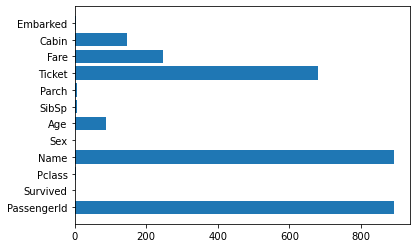

In [12]:
# Visualizando a informação acima de forma gráfica
fig, ax = plt.subplots()

ax.barh(base.nunique().index, base.nunique().values)

plt.show()

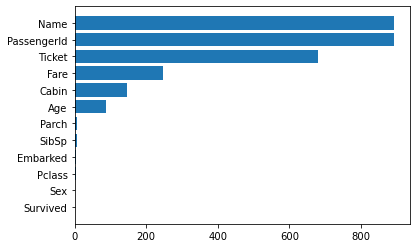

In [13]:
# Visualizando a informação acima de forma gráfica em ordem decrescente
base.nunique().sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(base.nunique().sort_values(ascending=True).index, base.nunique().sort_values(ascending=True).values)

plt.show()

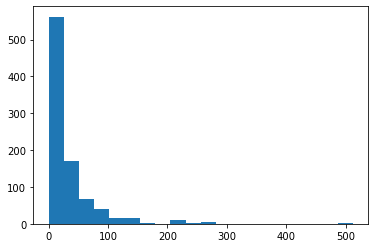

In [14]:
# Verificando o histograma das tarifas
fig, ax = plt.subplots()

# bins eu divido a quantidade de registros em quantas partes que quiser
# se tem 80 registros, vou ter 8 colunas de 10
ax.hist(base['Fare'], bins=20)

plt.show()

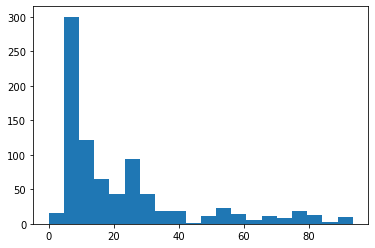

In [15]:
# Verificando o histograma das tarifas apenas para tarifas menores que 100 reais
fig, ax = plt.subplots()

ax.hist(base[base['Fare']<100]['Fare'], bins=20)

plt.show()

### O boxplot
- Permite visualizar os percentis e valores máximo e mínimo dos dados
- Permite visualizar, além de simetria e dispersão dos dados, valores extremos (outliers)
- O valor máximo e mínimo são calculados baseado no interquartil

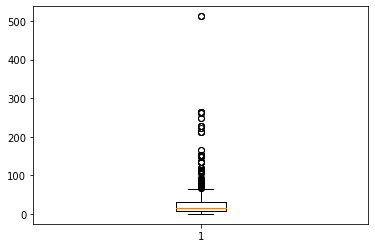

In [16]:
# Verificando para a coluna Fare
fig, ax = plt.subplots()

ax.boxplot(base['Fare'])

plt.show()

**O que o boxplot mostra?**

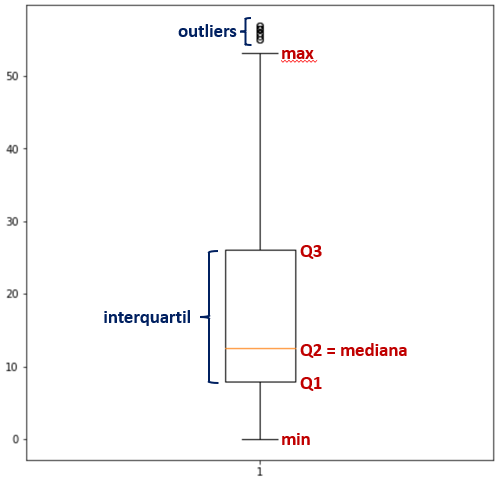

**Como eu tenho valores acima do valor máximo?**
- max = Q3 + 1,5*interquartil
- min  = Q1 - 1,5*interquartil
<br><br>
- E qual a importância disso?
    - Pois nos ajuda a perceber outliers

In [17]:
# Podemos acessar qualquer um dos valores do .describe()
base['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
# Determinando o interquartil
q1=base['Fare'].describe()['25%']
q2=base['Fare'].describe()['50%']
q3=base['Fare'].describe()['75%']
interquartil=q3-q1
# Calculando o valor máximo
vlr_max=q3+1.5*interquartil
vlr_max

65.6344

In [19]:
# Agora filtrando os valores acima do máximo
base[base['Fare']>vlr_max]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S


**Interpretando esses valores**

In [20]:
# Contando o número de linhas da base
base.shape

(891, 12)

In [21]:
# Verificando a quantidade de registros em cada intervalo (<Q1, entre Q1 e Q2, entre Q2 e Q3,>Q3)
# base[base['Fare']<q3]
base[(base['Fare']>q1) & (base['Fare']<q2)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


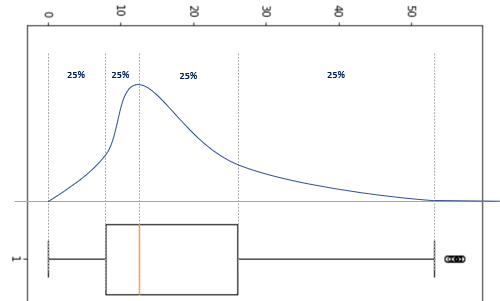

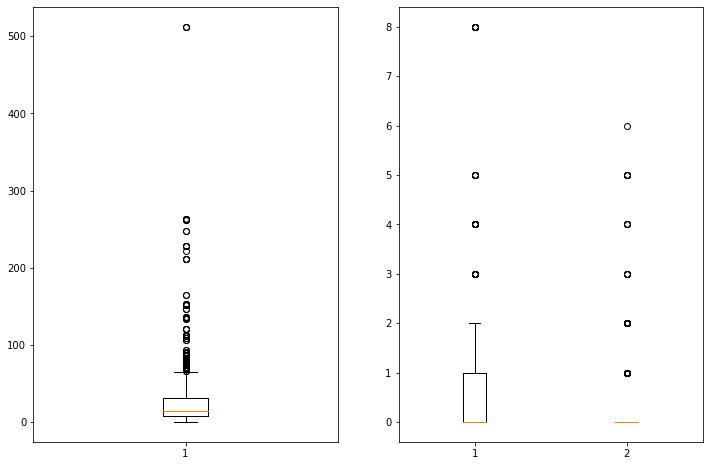

In [22]:
# Verificando para as colunas SibSp e Parch
fig, ax = plt.subplots(ncols=2, figsize=(12,8))

ax[0].boxplot([base['Fare']])
ax[1].boxplot([base['SibSp'],base['Parch']])

plt.show()

**Qual o motivo do segundo boxplot ser mostrado dessa forma?**

In [23]:
# Verificando o value_counts()
base['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
# Verificando o resumo estatístico para essa coluna
base['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

### Outras opções de gráficos

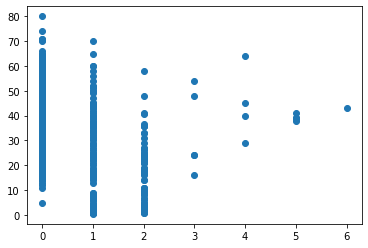

In [25]:
# Verificando se existe relação entre a coluna Parch e a idade
fig, ax = plt.subplots()

x=base['Parch']
y=base['Age']

ax.scatter(x, y)

plt.show()

**Criando uma matriz para mostrar a correlação de cada par de variáveis**
- Podemos usar do pandas o `.plotting.scatter_matrix()` ou do seaborn o `.pairplot()`

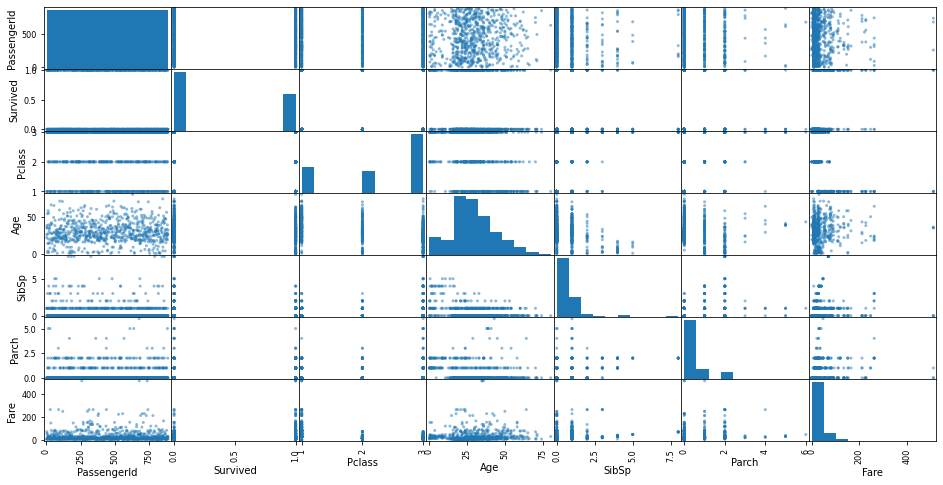

In [26]:
# Utilizando o pandas
pd.plotting.scatter_matrix(base,figsize=(16,8));

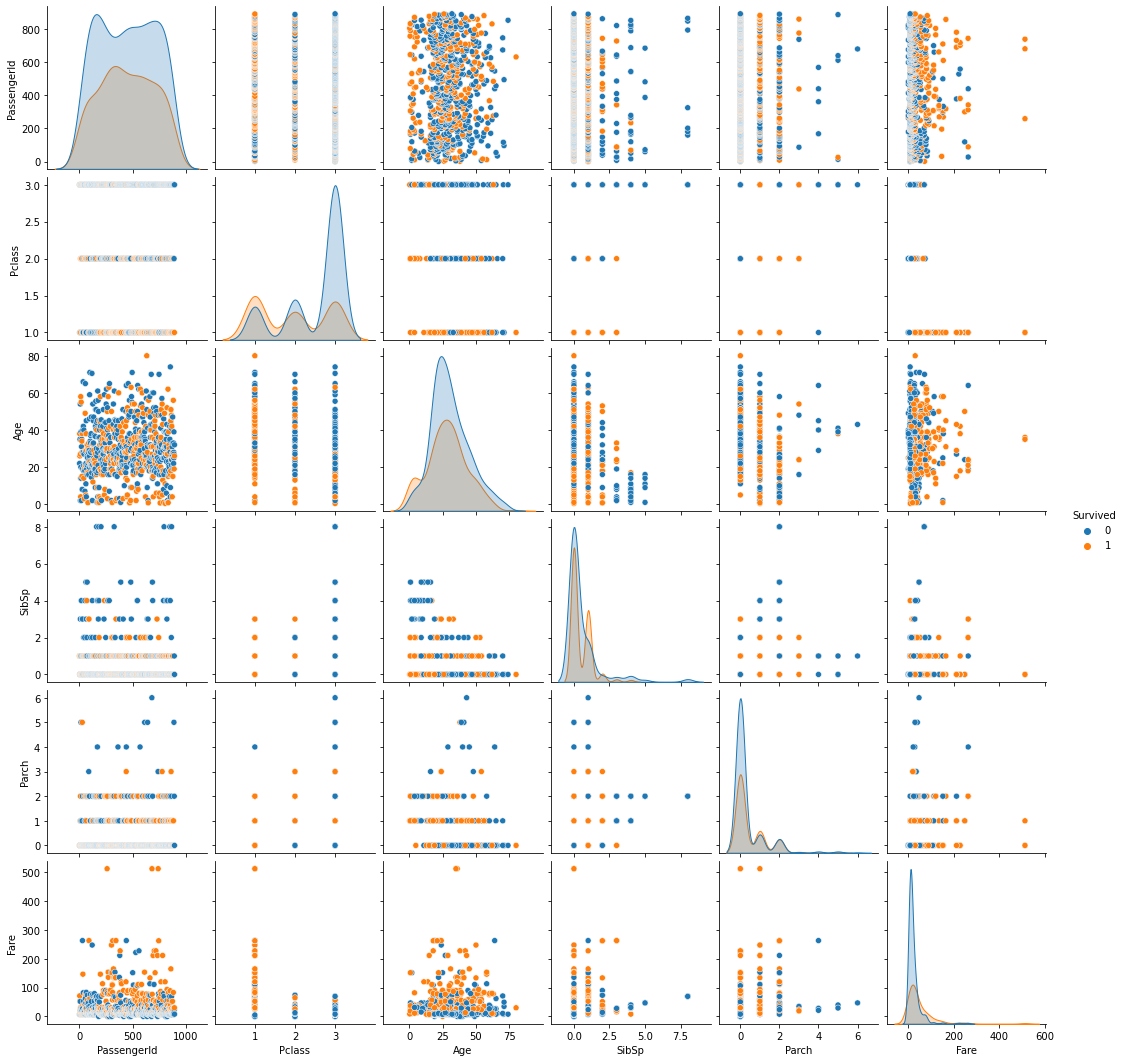

In [27]:
# Utilizando o seaborn
import seaborn as sns
sns.pairplot(base,hue='Survived')#,diag_kind='hist')
plt.show()

**Visualizando apenas o KDE**
- KDE: Kernel Density Estimation
    - Mede a chance de uma variável aleatória assumir determinado valor
    - A probabilidade é dada pela integral abaixo da curva na faixa de valor selecionada
- Parece uma "versão de linha suavizada" de um histograma
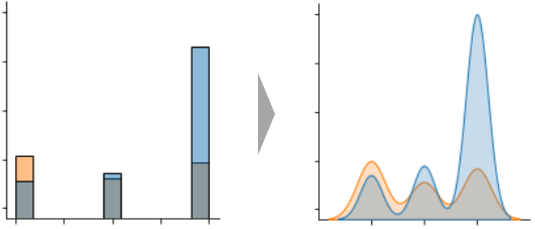

**Para fazer o kde no seaborn, podemos usar o `sns.kdeplot`**

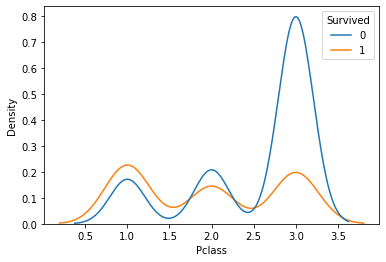

In [28]:
# Fazendo o kde para o Pclass
sns.kdeplot(base['Pclass'],hue=base['Survived']);
plt.show()

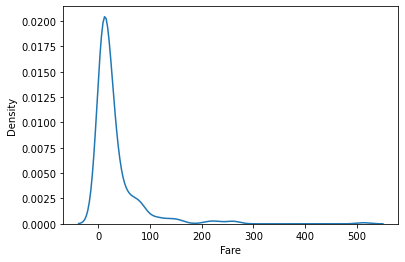

In [29]:
# Fazendo o kde para o Fare com e sem o Survived
sns.kdeplot(base['Fare'])#hue=base['Pclass']);
plt.show()

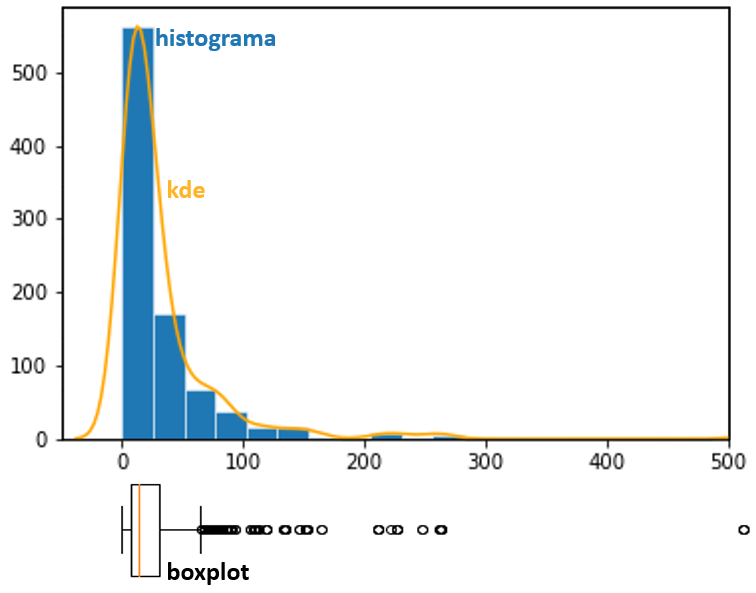

### Heatmap de correlação

In [30]:
# Verificando a correlação entre os dados
base.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

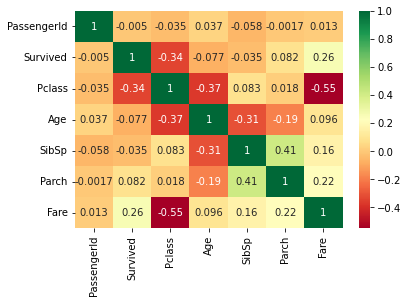

In [31]:
# Tornando visual
# cmap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')

**Correlação**
- Mostra o quanto duas variáveis estão relacionadas
- Vai de -1 (forte correlação negativa) até +1 (forte correlação positiva), onde 0 acontece quando não existe correlação
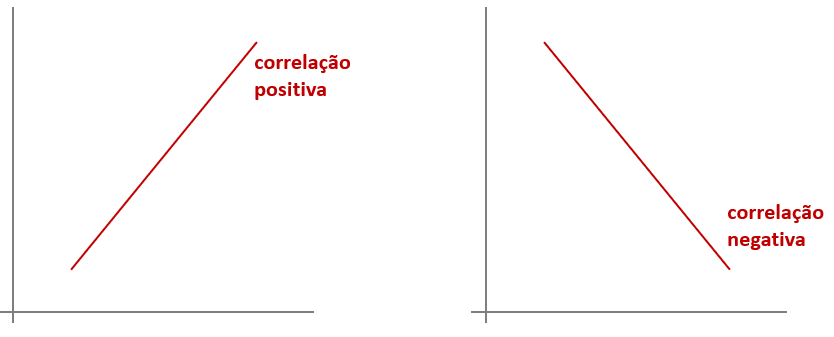

### Tratando valores vazios e outliers

#### Entendendo os outliers

In [32]:
# Filtrando apenas para esse valor muito maior que os demais
base[base['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [33]:
# Calculando a média
mean_fare=base['Fare'].mean()
mean_fare

32.2042079685746

In [34]:
# Substituindo esses valores
base.loc[base['Fare']<1,'Fare'] = mean_fare

In [35]:
base[base['Fare']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### Entendendo os valores nulos

In [36]:
# Verificando a base
base[base['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [37]:
# Entendendo melhor os valores
base.loc[base['Age'].isnull(),'Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

**Substituindo pelas média da idade**

In [39]:
# Calculando a média das idades
base.loc[base['Age'].notnull(),'Age'].mean()

29.69911764705882

In [40]:
# Substituindo os valores nulos por essa média
base.loc[base['Age'].isnull(),'Age']=base['Age'].mean()

In [41]:
# Verificando novamente a base
base.loc[base['Age'].isnull(),'Survived'].value_counts()

Series([], Name: Survived, dtype: int64)